# Discussion Week 3 - Linear Algebra and Probability

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import sklearn

## Linear Algebra Concept Review

Linear algebra is a fundamental mathematical discipline that plays a crucial role in data science. It provides the framework for representing and manipulating high-dimensional data efficiently.

Some key applications of linear algebra in data science include:

1. Principal Component Analysis (PCA): Used for dimensionality reduction and feature extraction.

2. Document similarity: Employing vector representations and cosine similarity for text analysis.

3. Recommendation systems: Utilizing matrix factorization techniques.

4. Neural networks: Forming the basis for deep learning architectures.

5. Image processing: Enabling transformations and filters through matrix operations.


These applications leverage concepts like vectors, matrices, eigenvalues, and vector spaces to solve complex data-driven problems and extract meaningful insights from large datasets.

In this part of the discussion, we will briefly cover the practical applications of linear algebra. 

In [2]:
# Datasets are essentially matrice representations of data. 
df = pd.read_csv('adult.csv')[['age', 'educational-num', 'hours-per-week', 'capital-gain']]
print("Data matrix: \n",  df.values)
print()
print("Shape of the data matrix: \n", df.values.shape)

Data matrix: 
 [[   25     7    40     0]
 [   38     9    50     0]
 [   28    12    40     0]
 ...
 [   58     9    40     0]
 [   22     9    20     0]
 [   52     9    40 15024]]

Shape of the data matrix: 
 (48842, 4)



Correlation matrix:
                      age  educational-num  hours-per-week  capital-gain
age              1.000000         0.030940        0.071558      0.077229
educational-num  0.030940         1.000000        0.143689      0.125146
hours-per-week   0.071558         0.143689        1.000000      0.082157
capital-gain     0.077229         0.125146        0.082157      1.000000


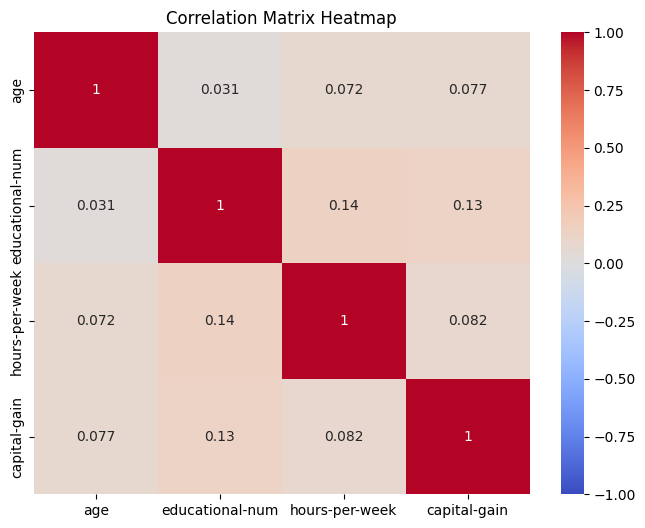

In [3]:
corr_matrix = df.corr()
print("\nCorrelation matrix:")
print(corr_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Singular Value Decomposition

SVD is used for PCA (Principal Component Analysis) - a dimensionality reduction technique. The singular values represented in the diagonal $S$ (or $\Sigma$) matrix represent the importance of every principal component. These are variables that are linear combinations of the original features. The goal is to capture the most variance in the data in a few components (1-3). 


In [4]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=100, n_features=5, centers=2, random_state=42)

print("X shape: \n", X.shape)
print("---")

# Perform SVD
U, S, Vt = np.linalg.svd(X)

print("U: \n", U)

print("\nSingular values:")
print(S)

print("\nVt: \n", Vt)



X shape: 
 (100, 5)
---
U: 
 [[ 0.08814731  0.10081177 -0.11434392 ... -0.11280452 -0.09427853
  -0.07544296]
 [ 0.08407765  0.08511954  0.19243598 ...  0.02611043 -0.15476017
   0.02269324]
 [ 0.08165265  0.12996916  0.01632731 ...  0.04334735  0.00688516
   0.25119478]
 ...
 [-0.12679595  0.08055866  0.1450679  ...  0.95674372  0.00187165
  -0.01077541]
 [ 0.08410256  0.14256653 -0.02314007 ...  0.00562472  0.94192144
  -0.02484833]
 [-0.09318299  0.06792384 -0.09145792 ... -0.01240139 -0.01538951
   0.92474245]]

Singular values:
[107.06109643  78.91978616  10.41265374  10.23175876   8.56705106]

Vt: 
 [[ 0.24872054  0.81993539 -0.20228962 -0.03566754 -0.47291731]
 [-0.53839811  0.18331679  0.72340274  0.25814514 -0.29423118]
 [-0.05944094  0.50995653  0.05431373  0.28299731  0.80831532]
 [ 0.20004969 -0.17740807 -0.20956906  0.92268425 -0.18232135]
 [-0.7776326   0.05071115 -0.62361704  0.02559687 -0.05623618]]


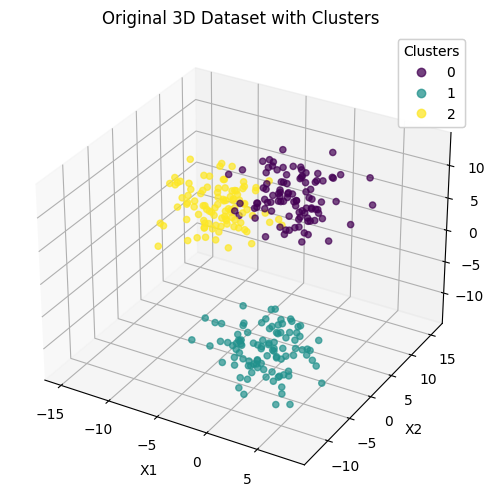

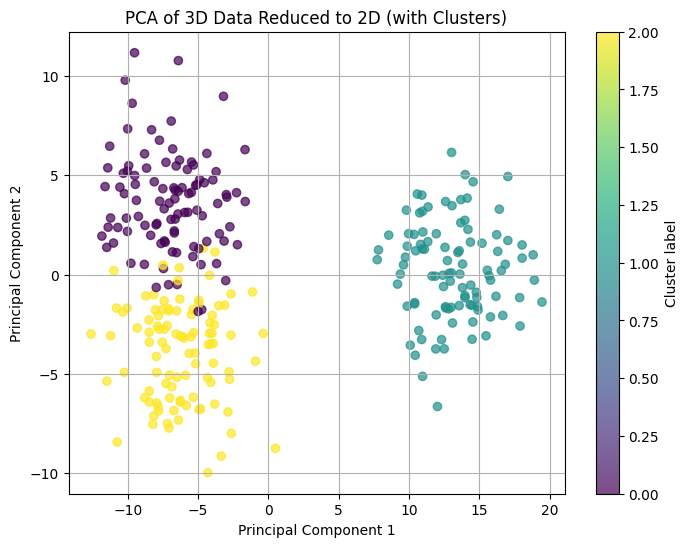

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

n_points = 300
n_clusters = 3
X, y = make_blobs(n_samples=n_points, centers=n_clusters, n_features=3, random_state=42, cluster_std=2.5)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', marker='o', alpha=0.7)
ax.set_title("Original 3D Dataset with Clusters")
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

# Step 3: Apply PCA to reduce dimensionality from 3D to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Step 4: Visualize the 2D PCA-transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', marker='o', alpha=0.7)
plt.title('PCA of 3D Data Reduced to 2D (with Clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

# Adding a legend
plt.colorbar(label='Cluster label')
plt.show()


### Document Similarity in Recommendation Systems


Document similarity is a crucial concept in recommendation systems, particularly for content-based filtering. By comparing the similarity between documents (such as product descriptions, movie plots, or user profiles), recommendation systems can suggest items that are most similar to those a user has previously liked or interacted with. This approach allows for personalized recommendations without relying on collaborative data from other users. Techniques like cosine similarity, as demonstrated in the following code, are commonly used to quantify the similarity between documents, enabling systems to rank and recommend items based on their content similarity. 


Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space. It is defined as the cosine of the angle between these vectors, providing a value between -1 and 1. 

The formula for cosine similarity between two vectors A and B is:

$\cos(\theta) = \frac{A \cdot B}{\|A\| \|B\|}$

Where:
- A · B is the dot product of vectors A and B
- ||A|| and ||B|| are the magnitudes (Euclidean norms) of vectors A and B

In document similarity, each document is represented as a vector in a high-dimensional space where each dimension corresponds to a term in the vocabulary. The cosine similarity then measures how similar the documents are based on the angle between these vectors, regardless of their absolute frequencies.

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Some sample documents - here documents are sentences
documents = [
    "Geometry is a branch of mathematics that deals with the properties and relationships of points, lines, angles, surfaces, and solids.",
    "Machine learning is a subset of data science focusing on predictive models.",
    "Statistics is an important tool in the field of data analysis.",
    "Deep learning is a branch of machine learning based on neural networks."
]

# Step 1: Create a document-term matrix (word frequency)
vectorizer = CountVectorizer(stop_words='english')
doc_term_matrix = vectorizer.fit_transform(documents).toarray() # Here - every row is a document and every column is a term (word)

# Get the feature names (terms)
terms = vectorizer.get_feature_names_out()

# Output the document-term matrix
print("Document-Term Matrix:\n", doc_term_matrix)
print("---")    
print("Terms:\n", terms)
print("---")

# Step 2: Calculate cosine similarity between the documents
cosine_sim = cosine_similarity(doc_term_matrix)

# Output the cosine similarity matrix
print("Cosine Similarity between the documents:\n", cosine_sim)


Document-Term Matrix:
 [[0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0]
 [0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0]
 [1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1]
 [0 0 1 1 0 0 1 0 0 0 0 2 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0]]
---
Terms:
 ['analysis' 'angles' 'based' 'branch' 'data' 'deals' 'deep' 'field'
 'focusing' 'geometry' 'important' 'learning' 'lines' 'machine'
 'mathematics' 'models' 'networks' 'neural' 'points' 'predictive'
 'properties' 'relationships' 'science' 'solids' 'statistics' 'subset'
 'surfaces' 'tool']
---
Cosine Similarity between the documents:
 [[1.         0.         0.         0.09534626]
 [0.         1.         0.14433757 0.3354102 ]
 [0.         0.14433757 1.         0.        ]
 [0.09534626 0.3354102  0.         1.        ]]


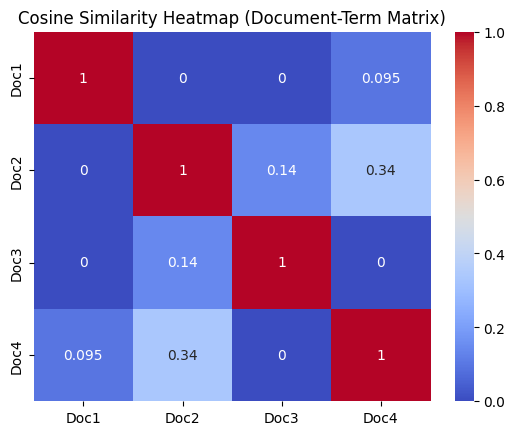

In [7]:
# Plot the cosine similarity matrix as a heatmap
sns.heatmap(cosine_sim, annot=True, cmap='coolwarm', xticklabels=['Doc1', 'Doc2', 'Doc3', 'Doc4'], yticklabels=['Doc1', 'Doc2', 'Doc3', 'Doc4'])
plt.title('Cosine Similarity Heatmap (Document-Term Matrix)')
plt.show()

### Group exercise: finding Top 3 Co-Purchased Products

In this exercise, we'll work with a co-purchase matrix to identify the top 3 products that are most frequently purchased together. A co-purchase matrix represents the frequency with which pairs of products are bought in the same transaction.

Given:
- A customer purchase matrix $A$ where the rows represent customers and the columns represent products. 
  - Each entry $A[i,j]$ is 1 if customer $i$ purchased item $j$, and 0 otherwise

How would you find the top 3 most commonly co-purchased items? 


In [8]:
# Example purchase matrix (customers x products)
A = np.array([
    [1, 0, 1, 1],
    [0, 1, 1, 0],
    [1, 1, 1, 0],
    [0, 1, 0, 1]
])

#### Discussion topics! 

1. Given what we said about principal components, how would you approach performing outlier detection using SVD?
2. In the document similarity code snippet, we are using the naive approach of representing the documents purely through frequencies of words. Do you think there's a better way? 

## Probability and Statistics

**Probability** is the mathematical study of uncertainty and events. It quantifies how likely events are to occur, with values ranging from 0 (impossible) to 1 (certain). Key concepts include:

- **Random Variables:** Variables whose outcomes are determined by chance.
- **Distributions:** Mathematical functions that describe the likelihood of different outcomes.
  - **Discrete Distributions:** Such as Bernoulli, Binomial, and Poisson, used for countable outcomes.
  - **Continuous Distributions:** Like Gaussian (Normal), used for measurable quantitie

**Statistics** involves collecting, analyzing, interpreting, and presenting data. It uses probability theory to make inferences about populations based on samples.

## 1. Random Variables
**Example: Weather Forecasting**
- **Scenario**: Predict the probability of rain using a Bernoulli random variable.
- **Exercise**: Simulate daily rain forecasts and visualize the results.

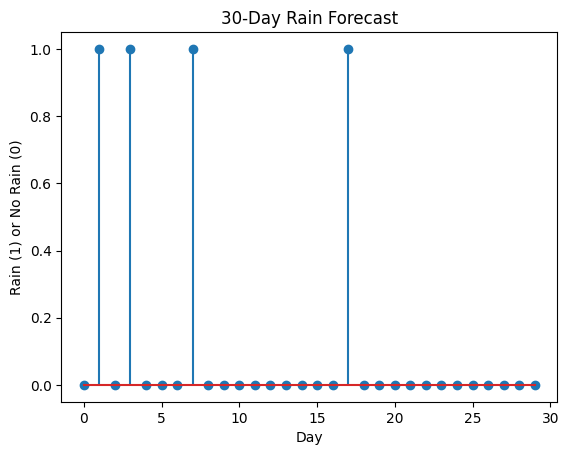

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate 30 days of rain forecasts (1 = rain, 0 = no rain)
rain_forecast = np.random.binomial(1, 0.3, 30)
plt.stem(rain_forecast)
plt.title('30-Day Rain Forecast')
plt.xlabel('Day')
plt.ylabel('Rain (1) or No Rain (0)')
plt.show()

## 2. Important Distributions
**Example**: Quality Control with the Binomial Distribution
 - **Scenario**: A factory tests light bulbs for defects. Use the binomial distribution to model defect rates.
 - **Exercise**: Simulate defect testing and calculate probabilities.

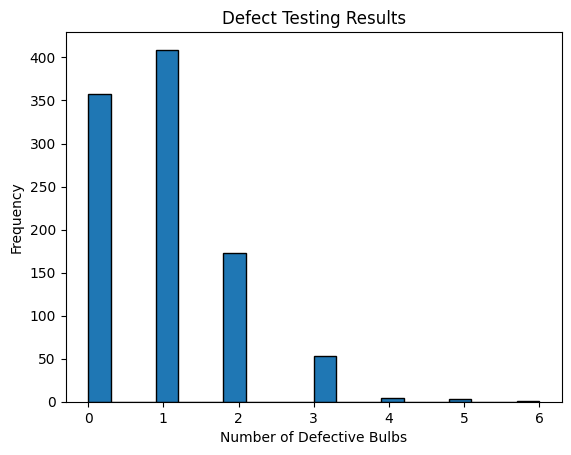

In [10]:
defects = np.random.binomial(10, 0.1, 1000)
plt.hist(defects, bins=20, edgecolor='black')
plt.title('Defect Testing Results')
plt.xlabel('Number of Defective Bulbs')
plt.ylabel('Frequency')
plt.show()

## 3. Multivariate Random Variables
**Example**: Investment Portfolio Analysis
- **Scenario**: Analyze the returns of two stocks using a multivariate Gaussian distribution.
- **Exercise**: Simulate stock returns and plot their joint distribution.

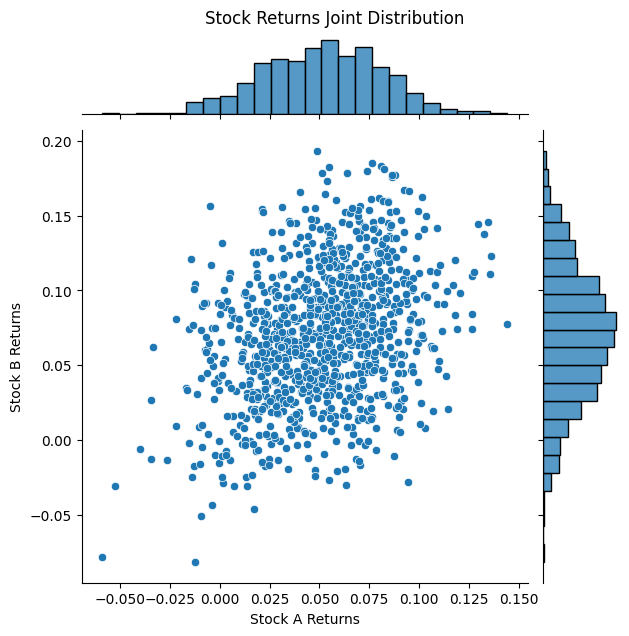

In [15]:
import seaborn as sns

# Mean returns and covariance matrix for two stocks
mean_returns = [0.05, 0.07]
cov_matrix = [[0.001, 0.0005], [0.0005, 0.002]]

# Simulate stock returns
returns = np.random.multivariate_normal(mean_returns, cov_matrix, 1000)

sns.jointplot(x=returns[:,0], y=returns[:,1], kind='scatter')
plt.suptitle('Stock Returns Joint Distribution', y=1.02)
plt.xlabel('Stock A Returns')
plt.ylabel('Stock B Returns')
plt.show()

## 4. Confidence Intervals
**Example**: Survey Analysis
- **Scenario**: Estimate the average height of a population from a sample.
- **Exercise**: Calculate and interpret the confidence interval for the sample mean.

In [12]:
import scipy.stats as stats

# Sample data: heights in cm
heights = np.random.normal(170, 10, 50)

# Calculate confidence interval
confidence_level = 0.95
degrees_freedom = len(heights) - 1
sample_mean = np.mean(heights)
sample_standard_error = stats.sem(heights)
confidence_interval = stats.t.interval(confidence_level, degrees_freedom, sample_mean, sample_standard_error)

print(f"95% Confidence Interval for Mean Height: {confidence_interval}")

95% Confidence Interval for Mean Height: (166.47907092944496, 171.30526863594486)


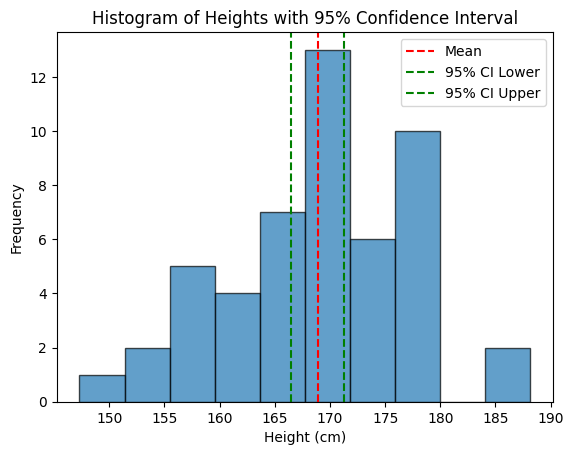

In [13]:
plt.hist(heights, bins=10, edgecolor='black', alpha=0.7)
plt.axvline(sample_mean, color='red', linestyle='--', label='Mean')
plt.axvline(confidence_interval[0], color='green', linestyle='--', label='95% CI Lower')
plt.axvline(confidence_interval[1], color='green', linestyle='--', label='95% CI Upper')
plt.title('Histogram of Heights with 95% Confidence Interval')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.legend()
plt.show()